In [48]:
import os
#only print error messages from tensorflow
import tensorflow as tf
import numpy as np
import math
import time
import pickle
import bz2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler
import copy
from sklearn.metrics import mean_squared_error,mean_absolute_error
import scipy.optimize as opt
from itertools import chain

In [49]:
def analytical_eq(xy,xo,yo,No,T):   
    x, y = xy
    
    Nex = 100000-No
    
    out = (No/math.pi)*np.exp(-(x-xo)**2)*np.exp(-(y-yo)**2) + (Nex/(2*math.pi*T))*np.exp((-(x-xo)**2)/(2*T))*np.exp((-(y-yo)**2)/(2*T))

    return out.ravel()

In [3]:
#reload data

print("loading data...")
in_file = bz2.BZ2File("./generated_data/full_generated_data.bz2",'rb')
data = pickle.load(in_file)
in_file.close()

print("data loaded.")

x_train = np.asarray(data[0])
y_train = np.asarray(data[1])
x_test = np.asarray(data[2])
y_test = np.asarray(data[3])

loading data...
data loaded.


### blah blah

In [94]:
x = np.linspace(-49, 50, 100)
y = np.linspace(-49, 50, 100)
x, y = np.meshgrid(x, y)

indx = 5

print(y_test[indx])

image = x_test[indx].ravel()

initial_guess = (0,0,50000,175)
popt, _ , infodict , _ , _ = opt.curve_fit(analytical_eq, (x, y), image, p0=initial_guess,full_output = True)

[  132.23956243 42466.77684532]


In [95]:
print(np.sqrt(np.sum(infodict["fvec"]**2)))

1624.7837767263707


In [96]:
fit_mse = mean_squared_error(analytical_eq((x,y),*popt[:2],*popt[2:][::-1]),x_test[indx].ravel(),squared = False)

In [97]:
fit_mse

158.93961970589802

In [98]:
mse = mean_squared_error(analytical_eq((x,y),0,0,*y_test[indx][::-1]),x_test[indx].ravel(),squared = False)

In [99]:
mse

23.015033049028506

In [100]:
y_test[indx]

array([  132.23956243, 42466.77684532])

In [101]:
popt

array([-1.51845259e-02, -1.53879236e-02,  3.84441094e+04,  1.07591586e+02])

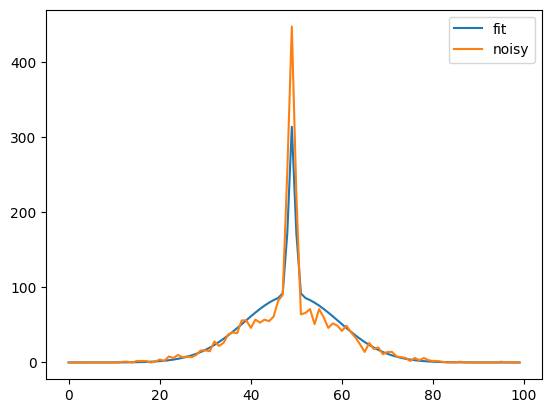

In [108]:
data_fitted = analytical_eq((x, y), 0,0,*popt[2:]).reshape(100,100)
noisy = image.reshape(100,100)
row = 47

plt.plot(np.arange(100),data_fitted[row],label = "fit")
plt.plot(np.arange(100),noisy[row],label = "noisy")
plt.legend()

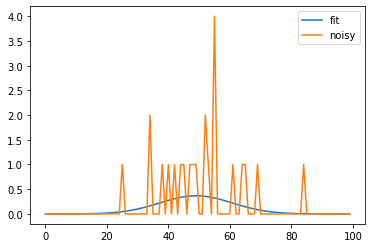

In [320]:
check = data_fitted.reshape(100,100)
noisy = image.reshape(100,100)
col = 10

plt.plot(np.arange(len(check[0])),check[:,col],label = "fit")
plt.plot(np.arange(len(check[0])),noisy[:,col],label = "noisy")
plt.legend()

In [321]:
just_col = image.reshape(100,100)[:,col]

In [322]:
def analytical_eq_y(xy,xo,yo,No,T):   
    x, y = xy
    
    Nex = 100000-No
        
    out = (No/math.pi)*np.exp(-(y-yo)**2) + (Nex/(2*math.pi*T))*np.exp((-(y-yo)**2)/(2*T))

    return out.ravel()

In [323]:
y[:,col].shape

(100,)

In [324]:
popt_col, _ = opt.curve_fit(analytical_eq_y, (x[:,col], y[:,col]), just_col, p0=initial_guess)

In [325]:
popt_col

array([ 0.00000000e+00, -1.00140284e+00,  3.35153697e+00,  7.43221063e+04])

In [326]:
col_fitted = analytical_eq_y((x, y), *popt_col[:2],*popt_col[2:])
col_fit = col_fitted.reshape(100,100)

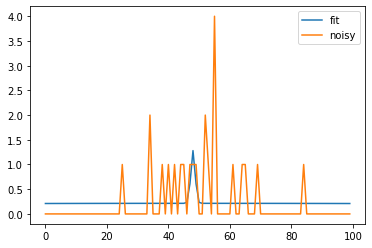

In [327]:
plt.plot(np.arange(len(check[0])),col_fit[:,col],label = "fit")
plt.plot(np.arange(len(check[0])),just_col,label = "noisy")
plt.legend()

In [328]:
y_test[indx]

array([  150.42190044, 25557.99864109])

In [329]:
popt_col

array([ 0.00000000e+00, -1.00140284e+00,  3.35153697e+00,  7.43221063e+04])

In [330]:
initial_guess_cols = (0,0,25557.9986412,150.42190042)

In [331]:
#think about forcing ranges
popt_col, _ = opt.curve_fit(analytical_eq_y, (x[:,col], y[:,col]), just_col, p0=initial_guess_cols, bounds = ([-1,-1,25555,150],[1,1,25560,151]))


In [332]:
popt_col

array([ 0.00000000e+00, -5.00556773e-01,  2.55579677e+04,  1.50436951e+02])

In [333]:
col_fitted = analytical_eq_y((x, y), *popt_col[:2],*popt_col[2:])

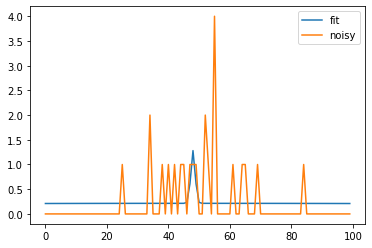

In [334]:
plt.plot(np.arange(len(check[0])),col_fit[:,col],label = "fit")
plt.plot(np.arange(len(check[0])),just_col,label = "noisy")
plt.legend()

### mar 19

In [157]:
x = np.linspace(-49, 50, 100)
y = np.linspace(-49, 50, 100)
x, y = np.meshgrid(x, y)

In [158]:
def analytical_eq(xy,T,No):   
    x, y = xy
    
    Nex = 100000-No
    
    out = (No/math.pi)*np.exp(-(x)**2)*np.exp(-(y)**2) + (Nex/(2*math.pi*T))*np.exp((-(x)**2)/(2*T))*np.exp((-(y)**2)/(2*T))

    return out.ravel()

In [242]:
num_images = 10

In [260]:
preds = []
for pair in zip(x_test[:num_images],y_test[:num_images]):
    im,labs = pair
    
    trans_temp = (100000/(2*1*1.645))**(1/2)
    
    guess_num_atoms = 0
    guess_temp = max(0,labs[0]+ (np.random.rand()-0.5)*2)
    if labs[1] > 0:
        guess_num_atoms = max(0,labs[1]+ (np.random.rand()-0.5)*2)
        guess_temp = np.sqrt(-((guess_num_atoms / 100000) - 1)*(trans_temp)**2)
    initial_guess = [guess_temp,guess_num_atoms]    
    low_bounds = [max(0,lab - 2) for lab in labs]
    high_bounds = [labs[0]+2,min(labs[1]+2,100000)]
    
    print(initial_guess)
    print(low_bounds,high_bounds)
    
#     initial_guess = [labs[0] + (np.random.rand()-0.5)*20 ,labs[1] + (np.random.rand()-0.5)*25000 ]
    
    popts = []
    for i in range(100):
        popt_x, _ = opt.curve_fit(analytical_eq, (x[i],y[i]), im[i], p0=initial_guess,maxfev = 10000,bounds = (low_bounds,high_bounds))
        popt_y, _ = opt.curve_fit(analytical_eq, (x[:,i],y[:,i]), im[i], p0=initial_guess,maxfev = 10000,bounds = (low_bounds,high_bounds))
        popts.append(popt_x)
        popts.append(popt_y)
    preds.append(np.mean(popts,axis = 0))

[150.42177805007177, 25558.119784358776]
[148.42190044474083, 25555.998641089274] [152.42190044474083, 25559.998641089274]
[135.3969373313849, 39686.6321986146]
[133.39743506753794, 39684.18875876378] [137.39743506753794, 39688.18875876378]
[333.68041534473514, 0]
[331.66982368700155, 0] [335.66982368700155, 2.0]
[169.88475384406297, 5047.870653315618]
[167.8851907308781, 5045.38228239614] [171.8851907308781, 5049.38228239614]
[219.82626101211488, 0]
[217.29876936682524, 0] [221.29876936682524, 2.0]
[132.2401490303163, 42466.26641880673]
[130.2395624263856, 42464.77684532485] [134.2395624263856, 42468.77684532485]
[241.3731338530372, 0]
[239.6081619360145, 0] [243.6081619360145, 2.0]
[298.39729789856784, 0]
[297.1502181719717, 0] [301.1502181719717, 2.0]
[322.64496349842, 0]
[320.1543741495309, 0] [324.1543741495309, 2.0]
[93.65517590690578, 71142.4494050351]
[91.65594370604207, 71139.97624606594] [95.65594370604207, 71143.97624606594]


In [261]:
preds = np.array(preds)

In [262]:
fit_N_rmse = mean_squared_error(preds[:num_images,1],y_test[:num_images,1],squared = False)
fit_N_rmse

0.6788558084665807

In [263]:
fit_T_rmse = mean_squared_error(preds[:num_images,0],y_test[:num_images,0],squared = False)
fit_T_rmse

0.5904010189428848

In [264]:
fit_residuals = preds - y_test[:num_images]

Text(0.5, 1.0, 'Fit Temperature Residuals')

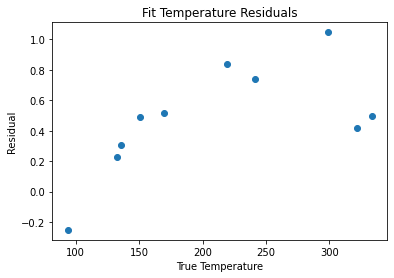

In [265]:
#fit temperature residuals
plt.scatter(y_test[:num_images,0],fit_residuals[:,0])
plt.xlabel("True Temperature")
plt.ylabel("Residual")
plt.title("Fit Temperature Residuals")

Text(0.5, 1.0, 'Fit Nc Residuals')

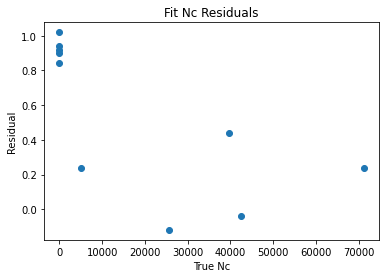

In [266]:
#fit temperature residuals
plt.scatter(y_test[:num_images,1],fit_residuals[:,1])
plt.xlabel("True Nc")
plt.ylabel("Residual")
plt.title("Fit Nc Residuals")